<a href="https://colab.research.google.com/github/Lion815/CoTMqtt/blob/main/Copy_of_OISAP_Neural_Network_practise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
train = datasets.MNIST('./data/', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

100%|██████████| 9912422/9912422 [00:00<00:00, 87462814.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 42608404.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21440037.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7060981.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
test = datasets.MNIST('./data/', train=True, download=False,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [ ]:
# Dictionary to store the count of samples for each class
class_count = {}

# Iterate through the dataset and count samples for each class
for _, label in train:
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1

# Print the count of samples for each class
for ?, ? in class_count.items():
    print(f"Class {class_label}: {count} samples")

Class 5: 5421 samples
Class 0: 5923 samples
Class 4: 5842 samples
Class 1: 6742 samples
Class 9: 5949 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples


In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)


In [6]:
def show_images_by_class(dataset, class_label, num_images=5):
    images = [image for image, label in dataset if label == class_label]
    fig, axs = plt.subplots(1, num_images, figsize=(12, 2))

    for i in range(num_images):
        axs[i].imshow(images[i].squeeze(), cmap='gray')
        axs[i].axis('off')

    plt.show()


**Task: Display 10 images of each class from the training data**

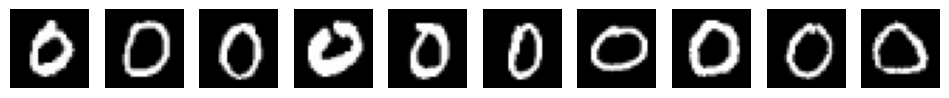

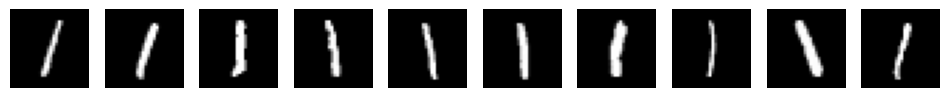

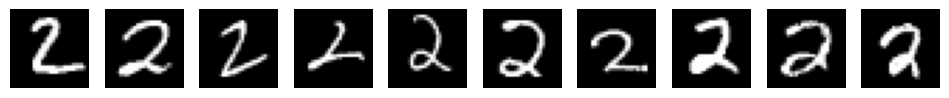

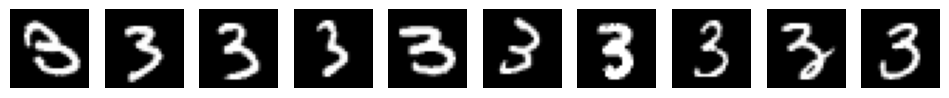

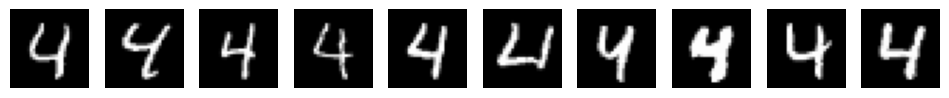

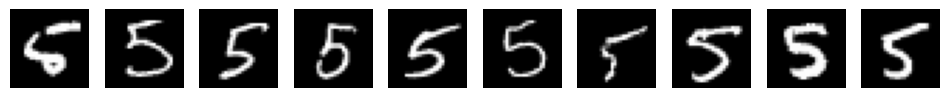

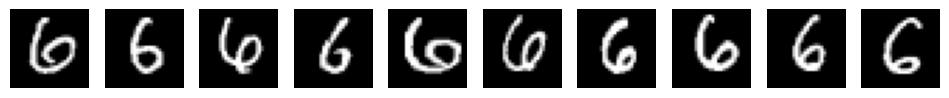

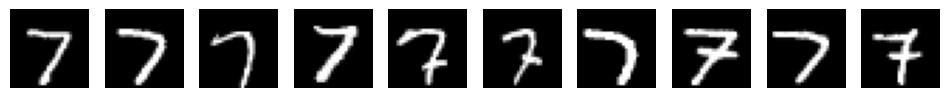

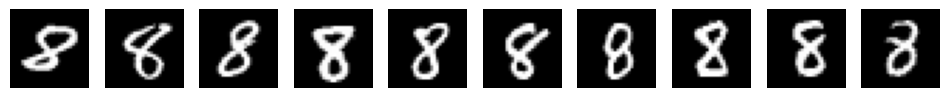

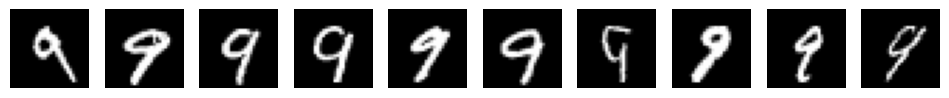

In [9]:
#add your code here
for cls in range(10) :
    show_images_by_class(train,cls,10)

In [10]:
class Net(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)


  def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.fc2(x1)
        x3 = self.fc3(x2)

        return F.log_softmax(x3, dim=1)

In [11]:
net=Net()
print(net)
net = net.to('cuda')

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [14]:
loss_function = nn.CrossEntropyLoss()

In [15]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
for epoch in range(5):
  for data in trainset:
    X, y = data
    #print(X.shape)
    X, y = X.to(device), y.to(device)
    net.zero_grad()
    X1=X.view(-1,784)
    output = net(X1)
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()

  print("Loss:", loss)


Loss: tensor(0.3384, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss: tensor(0.2069, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss: tensor(0.1756, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss: tensor(0.2481, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss: tensor(0.1414, device='cuda:0', grad_fn=<NllLossBackward0>)


In [17]:
correct=0
total = 0

with torch.no_grad():
  for data in testset:
        X, y = data
        X, y = X.to(device), y.to(device)
        output = net(X.view(-1,784))
        # print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.892
